In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

In [2]:
#pip install numpy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from sklearn.model_selection import train_test_split


In [4]:
#pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
df1=pd.read_csv("ttrain.csv")
df2=pd.read_csv("ttest.csv") 

In [6]:
df=pd.concat([df1,df2],ignore_index=True)

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [9]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [10]:
df.Name.value_counts()


Connolly, Miss. Kate                                   2
Kelly, Mr. James                                       2
Braund, Mr. Owen Harris                                1
Johnson, Master. Harold Theodor                        1
Gustafsson, Mr. Alfred Ossian                          1
                                                      ..
Carter, Miss. Lucile Polk                              1
Silvey, Mr. William Baird                              1
Kallio, Mr. Nikolai Erland                             1
Louch, Mrs. Charles Alexander (Alice Adelaide Slow)    1
Peter, Master. Michael J                               1
Name: Name, Length: 1307, dtype: int64

EDA

In [11]:
df["Title"]=df["Name"].str.extract("([A-Za-z]+)\.",expand=False)
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Title']=df['Title'].replace(['Dr','Major','Col','Capt','Sir','Rev','Jonkheer','Don'],'Mr')

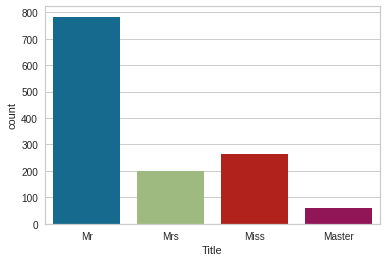

In [12]:
df['Title'].value_counts()
sns.countplot(df["Title"])

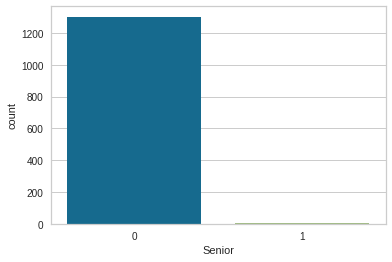

In [13]:
df["Senior"]=df["Age"].map(lambda s:1 if s>70 else 0)
sns.countplot(df["Senior"])

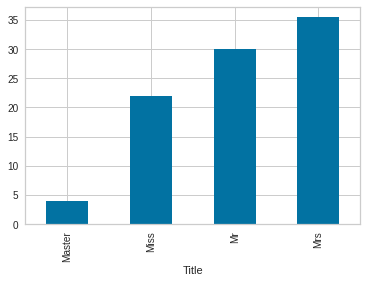

In [14]:
#Age'i ortalama değerleri ile dolduralım
df["Age"].fillna(df.groupby("Title")["Age"].transform("median"),inplace=True)
df.groupby("Title")["Age"].median().plot.bar()

In [15]:
df = df.drop(["Cabin"],axis=1)

In [16]:
df["Fare"].fillna(df["Fare"].median(),inplace=True)

In [17]:
df['Family']=df['SibSp']+df['Parch']+1

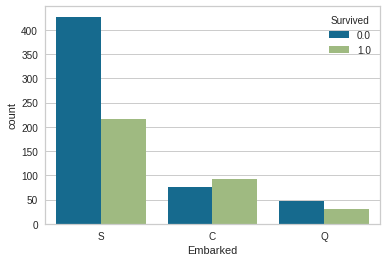

In [18]:
sns.countplot(df["Embarked"],hue=df["Survived"])

In [19]:
df["Embarked"]=df["Embarked"].fillna("S")

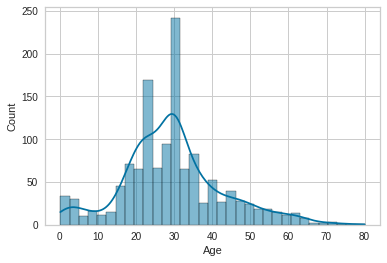

In [20]:

sns.histplot(df["Age"],kde=True)

In [21]:
df = df.drop(['Ticket'],axis=1)

In [22]:
df = df.drop(['Name'],axis=1)

In [23]:
df=pd.get_dummies(df,drop_first=True)

In [24]:
df.shape

(1309, 15)

In [25]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Senior,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,1,0.0,3,22.0,1,0,7.2500,0,2,1,0,1,0,1,0
1,2,1.0,1,38.0,1,0,71.2833,0,2,0,0,0,0,0,1
2,3,1.0,3,26.0,0,0,7.9250,0,1,0,0,1,1,0,0
3,4,1.0,1,35.0,1,0,53.1000,0,2,0,0,1,0,0,1
4,5,0.0,3,35.0,0,0,8.0500,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,30.0,0,0,8.0500,0,1,1,0,1,0,1,0
1305,1306,NaN,1,39.0,0,0,108.9000,0,1,0,0,0,0,0,1
1306,1307,NaN,3,38.5,0,0,7.2500,0,1,1,0,1,0,1,0
1307,1308,NaN,3,30.0,0,0,8.0500,0,1,1,0,1,0,1,0


In [26]:
x,y=df[:891].drop("Survived",axis=1),df[:891][["Survived"]]

In [27]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Senior,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,1,3,22.0,1,0,7.2500,0,2,1,0,1,0,1,0
1,2,1,38.0,1,0,71.2833,0,2,0,0,0,0,0,1
2,3,3,26.0,0,0,7.9250,0,1,0,0,1,1,0,0
3,4,1,35.0,1,0,53.1000,0,2,0,0,1,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,0,1,1,0,1,0,1,0
887,888,1,19.0,0,0,30.0000,0,1,0,0,1,1,0,0
888,889,3,22.0,1,2,23.4500,0,4,0,0,1,1,0,0
889,890,1,26.0,0,0,30.0000,0,1,1,0,0,0,1,0


In [28]:
x.shape,y.shape

((891, 14), (891, 1))

In [29]:
y

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
886,0.0
887,1.0
888,0.0
889,1.0



Written function for models

In [30]:
def result_func(model,count):
    predict_x=model.predict(df[891:].drop("Survived",axis=1))
    result_dataset=pd.DataFrame()
    result_dataset["PassengerId"]=df[891:]["PassengerId"]
    result_dataset["Predict"]=predict_x
    result_dataset["Survived"]=result_dataset["Predict"].map(lambda s:1 if s>=0.5 else 0 )
    print(result_dataset["Survived"].value_counts().plot.bar())
    result_dataset.drop("Predict",axis=1).to_csv("titanic_deep_learning_result_model{}.csv".format(count),index=False)
    return result_dataset 

Model 1

In [31]:
model=Sequential()
model.add(Dense(14,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [32]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [33]:
model.fit(x,y,epochs=150,batch_size=10,verbose=1)

Epoch 1/150
90/90 [==============================] - 1s 2ms/step - loss: 18.6475 - accuracy: 0.4635
Epoch 2/150
90/90 [==============================] - 0s 2ms/step - loss: 1.3090 - accuracy: 0.5421
Epoch 3/150
90/90 [==============================] - 0s 2ms/step - loss: 0.9719 - accuracy: 0.5802
Epoch 4/150
90/90 [==============================] - 0s 2ms/step - loss: 0.8251 - accuracy: 0.5657
Epoch 5/150
90/90 [==============================] - 0s 2ms/step - loss: 0.7407 - accuracy: 0.5802
Epoch 6/150
90/90 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.6139
Epoch 7/150
90/90 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.6027
Epoch 8/150
90/90 [==============================] - 0s 2ms/step - loss: 0.6600 - accuracy: 0.6352
Epoch 9/150
90/90 [==============================] - 0s 2ms/step - loss: 0.6526 - accuracy: 0.6308
Epoch 10/150
90/90 [==============================] - 0s 2ms/step - loss: 0.6448 - accuracy: 0.6498
Epoch 11

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                210       
                                                                 
 dense_1 (Dense)             (None, 10)                150       
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


In [35]:
scores=model.evaluate(x,y)

28/28 [==============================] - 0s 2ms/step - loss: 0.4206 - accuracy: 0.8025


In [36]:
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

accuracy: 80.25%


For Model 1

14/14 [==============================] - 0s 1ms/step
AxesSubplot(0.125,0.125;0.775x0.755)


,PassengerId,Predict,Survived
891,892,0.147810,0
892,893,0.519611,1
893,894,0.115814,0
894,895,0.146798,0
895,896,0.639636,1
896,897,0.189766,0
897,898,0.670823,1
898,899,0.220297,0
899,900,0.794051,1
900,901,0.139648,0


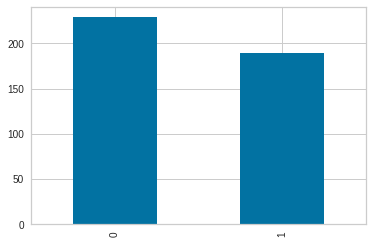

In [37]:
result_func(model,1)

In [38]:
history=model.fit(x,y,epochs=150,batch_size=10,verbose=1)

Epoch 1/150
90/90 [==============================] - 0s 2ms/step - loss: 0.4610 - accuracy: 0.8103
Epoch 2/150
90/90 [==============================] - 0s 2ms/step - loss: 0.4287 - accuracy: 0.8036
Epoch 3/150
90/90 [==============================] - 0s 2ms/step - loss: 0.4316 - accuracy: 0.8013
Epoch 4/150
90/90 [==============================] - 0s 2ms/step - loss: 0.4340 - accuracy: 0.8092
Epoch 5/150
90/90 [==============================] - 0s 2ms/step - loss: 0.4375 - accuracy: 0.8036
Epoch 6/150
90/90 [==============================] - 0s 2ms/step - loss: 0.4326 - accuracy: 0.7980
Epoch 7/150
90/90 [==============================] - 0s 2ms/step - loss: 0.4267 - accuracy: 0.7969
Epoch 8/150
90/90 [==============================] - 0s 2ms/step - loss: 0.4339 - accuracy: 0.8036
Epoch 9/150
90/90 [==============================] - 0s 2ms/step - loss: 0.4320 - accuracy: 0.7946
Epoch 10/150
90/90 [==============================] - 0s 2ms/step - loss: 0.4314 - accuracy: 0.8081
Epoch 11/

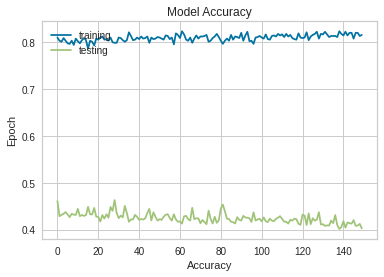

In [39]:
fig1=plt.figure(1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
plt.legend(["training", "testing"], loc= "upper left")

Model 2

In [40]:
model=Sequential()
model.add(Dense(14,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [41]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [42]:
model.fit(x,y,validation_split=0.2,epochs=200,batch_size=10,verbose=2)

Epoch 1/200
72/72 - 1s - loss: 1.4520 - accuracy: 0.5309 - val_loss: 0.7931 - val_accuracy: 0.7151 - 1s/epoch - 17ms/step
Epoch 2/200
72/72 - 0s - loss: 0.7479 - accuracy: 0.5449 - val_loss: 0.7538 - val_accuracy: 0.7263 - 158ms/epoch - 2ms/step
Epoch 3/200
72/72 - 0s - loss: 0.7034 - accuracy: 0.5660 - val_loss: 0.7432 - val_accuracy: 0.6536 - 155ms/epoch - 2ms/step
Epoch 4/200
72/72 - 0s - loss: 0.6641 - accuracy: 0.6152 - val_loss: 0.8763 - val_accuracy: 0.6927 - 149ms/epoch - 2ms/step
Epoch 5/200
72/72 - 0s - loss: 0.6696 - accuracy: 0.6194 - val_loss: 0.5901 - val_accuracy: 0.6816 - 171ms/epoch - 2ms/step
Epoch 6/200
72/72 - 0s - loss: 0.6654 - accuracy: 0.6180 - val_loss: 0.6154 - val_accuracy: 0.6648 - 178ms/epoch - 2ms/step
Epoch 7/200
72/72 - 0s - loss: 0.6703 - accuracy: 0.6096 - val_loss: 0.6408 - val_accuracy: 0.6425 - 176ms/epoch - 2ms/step
Epoch 8/200
72/72 - 0s - loss: 0.6693 - accuracy: 0.6096 - val_loss: 0.6418 - val_accuracy: 0.6425 - 198ms/epoch - 3ms/step
Epoch 9/20

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 14)                210       
                                                                 
 dense_5 (Dense)             (None, 9)                 135       
                                                                 
 dense_6 (Dense)             (None, 4)                 40        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 390
Trainable params: 390
Non-trainable params: 0
_________________________________________________________________


In [44]:

scores=model.evaluate(x,y)

28/28 [==============================] - 0s 2ms/step - loss: 0.4647 - accuracy: 0.8002


In [45]:

print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

accuracy: 80.02%


For Model 2

14/14 [==============================] - 0s 2ms/step
AxesSubplot(0.125,0.125;0.775x0.755)


,PassengerId,Predict,Survived
891,892,0.148115,0
892,893,0.474441,0
893,894,0.171982,0
894,895,0.155061,0
895,896,0.632607,1
896,897,0.229176,0
897,898,0.621853,1
898,899,0.417773,0
899,900,0.762569,1
900,901,0.269208,0


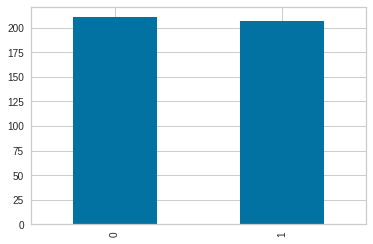

In [46]:
result_func(model,2)

In [47]:
history=model.fit(x,y,validation_split=0.2,epochs=200,batch_size=10,verbose=2)

Epoch 1/200
72/72 - 0s - loss: 0.4354 - accuracy: 0.8160 - val_loss: 0.4550 - val_accuracy: 0.7765 - 244ms/epoch - 3ms/step
Epoch 2/200
72/72 - 0s - loss: 0.4302 - accuracy: 0.8258 - val_loss: 0.4372 - val_accuracy: 0.7821 - 160ms/epoch - 2ms/step
Epoch 3/200
72/72 - 0s - loss: 0.4407 - accuracy: 0.8020 - val_loss: 0.4014 - val_accuracy: 0.7877 - 202ms/epoch - 3ms/step
Epoch 4/200
72/72 - 0s - loss: 0.4372 - accuracy: 0.8174 - val_loss: 0.4040 - val_accuracy: 0.7821 - 185ms/epoch - 3ms/step
Epoch 5/200
72/72 - 0s - loss: 0.4318 - accuracy: 0.8202 - val_loss: 0.4056 - val_accuracy: 0.7877 - 177ms/epoch - 2ms/step
Epoch 6/200
72/72 - 0s - loss: 0.4348 - accuracy: 0.8090 - val_loss: 0.4033 - val_accuracy: 0.7877 - 168ms/epoch - 2ms/step
Epoch 7/200
72/72 - 0s - loss: 0.4368 - accuracy: 0.8034 - val_loss: 0.4049 - val_accuracy: 0.8324 - 172ms/epoch - 2ms/step
Epoch 8/200
72/72 - 0s - loss: 0.4333 - accuracy: 0.8076 - val_loss: 0.3995 - val_accuracy: 0.8045 - 162ms/epoch - 2ms/step
Epoch 9/

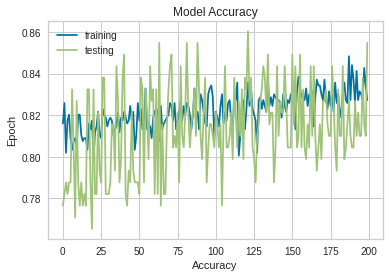

In [48]:
fig1=plt.figure(1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
plt.legend(["training", "testing"], loc= "upper left")



<function matplotlib.pyplot.show(*args, **kw)>

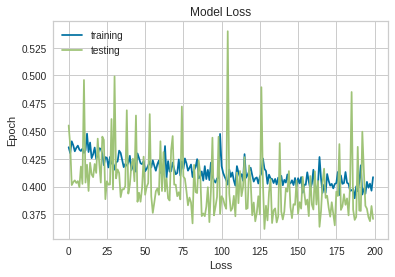

In [49]:
fig1=plt.figure(2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Loss")
plt.ylabel("Epoch")
plt.legend(["training", "testing"], loc= "upper left")

plt.show

PyCaret

In [92]:
#!pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [93]:
#!pip install typing-extensions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
#!pip install wheel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [81]:
#pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#pip install --force-reinstall numpy==1.20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 57.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.20.0 which is incompatible.
xarray-einstats 0.4.0 requires scipy>=1.6, but you have scipy 1.5.4 which is incompatible.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 2.3.9 which is incompatible.
cmdstanpy 1.0.8 requires numpy>=1.21, but you have numpy 1.20.0 which is incompatible.


In [1]:
from pycaret.classification import *

In [50]:
setup(data=df, target="Survived")

,Description,Value
0,session_id,947
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(1309, 15)"
5,Missing Values,True
6,Numeric Features,9
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=['PassengerId'],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Survived',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=Non...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
         

(False,
       PassengerId  Survived  Pclass   Age  SibSp  Parch      Fare  Senior  \
 0               1       0.0       3  22.0      1      0    7.2500       0   
 1               2       1.0       1  38.0      1      0   71.2833       0   
 2               3       1.0       3  26.0      0      0    7.9250       0   
 3               4       1.0       1  35.0      1      0   53.1000       0   
 4               5       0.0       3  35.0      0      0    8.0500       0   
 ...           ...       ...     ...   ...    ...    ...       ...     ...   
 1304         1305       NaN       3  30.0      0      0    8.0500       0   
 1305         1306       NaN       1  39.0      0      0  108.9000       0   
 1306         1307       NaN       3  38.5      0      0    7.2500       0   
 1307         1308       NaN       3  30.0      0      0    8.0500       0   
 1308         1309       NaN       3   4.0      1      1   22.3583       0   
 
       Family  Sex_male  Embarked_Q  Embarked_S  Title

In [51]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8298,0.8592,0.7343,0.8131,0.7693,0.6356,0.6396,0.111
lightgbm,Light Gradient Boosting Machine,0.8298,0.8629,0.7508,0.8027,0.7742,0.6383,0.6408,0.115
lda,Linear Discriminant Analysis,0.8119,0.8556,0.7137,0.7847,0.7460,0.5978,0.6006,0.018
ridge,Ridge Classifier,0.8103,0.0000,0.7097,0.7844,0.7435,0.5942,0.5974,0.015
lr,Logistic Regression,0.8087,0.8569,0.7177,0.7768,0.7440,0.5923,0.5952,0.516
rf,Random Forest Classifier,0.8071,0.8448,0.7258,0.7710,0.7459,0.5911,0.5936,0.224
ada,Ada Boost Classifier,0.7959,0.8415,0.7215,0.7482,0.7315,0.5676,0.5710,0.101
dt,Decision Tree Classifier,0.7830,0.7731,0.7467,0.7172,0.7294,0.5489,0.5518,0.015
et,Extra Trees Classifier,0.7669,0.8118,0.6890,0.7113,0.6987,0.5090,0.5104,0.195
knn,K Neighbors Classifier,0.6866,0.7235,0.5375,0.6200,0.5695,0.3269,0.3325,0.024


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=947, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................
